In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글설정
# matplotlib.rcParams['font.family'] = 'AppleGothic'    # Mac용
matplotlib.rcParams['font.family'] = 'Malgun Gothic'    # Win용
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

# df = pd.read_excel('score.xlsx',index_col='지원번호')
df = pd.read_csv('drinks.csv')

In [58]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [59]:
df.groupby('continent')['total_servings'].sum() 

KeyError: 'Column not found: total_servings'

In [63]:
df['continent'].fillna('OT',inplace=True)

In [64]:
## 대륙별 나라 개수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

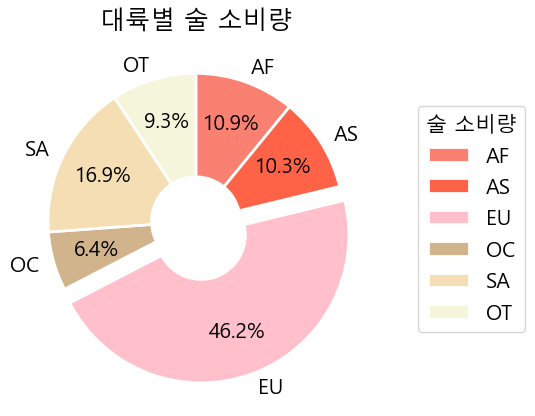

In [74]:
### total_servings 컬럼을 추가
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']

### 대륙별 total_servings를 원 그래프로 출력하시오.
values = df.groupby('continent')['total_servings'].sum() 
# df['continent'].unique()  # 순서가 달라서 쓸수없음
labels = ['AF','AS','EU','OC','SA','OT']
colors = ['salmon','tomato','pink','tan','wheat','beige']
wedgeprops = {'width':0.7,'edgecolor':'white','linewidth':2}
explod = [0,0,0.1,0,0,0]

plt.title("대륙별 술 소비량")

plt.pie(values,labels=labels,autopct='%.1f%%',colors=colors,wedgeprops=wedgeprops,startangle=90,counterclock=False,pctdistance=0.7,explode=explod)

plt.legend(loc=(1.1,0.2),title='술 소비량')
plt.show()

In [75]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'total_servings'],
      dtype='object')

In [ ]:
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하시오.
# 1. 전체 평균 도수 구하기
data = df['total_litres_of_pure_alcohol'].mean()
# 2. 대륙별 도수 평균 구하기
total_df =df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 필터 구하기
filt = total_df > data
# 4. 필터 적용해서 출력
total_df[filt]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [125]:
## 평균 beer_servings 가장 높은 대륙
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1).index[0]
## 대륙별 beer_servings 높은순으로 출력하시오.
df.groupby('continent')['beer_servings'].mean().max()  # index의 해당되는 value값
## 제일 높은 대륙만 출력
df.groupby('continent')['beer_servings'].mean().idxmax()  # index가 출력

'EU'

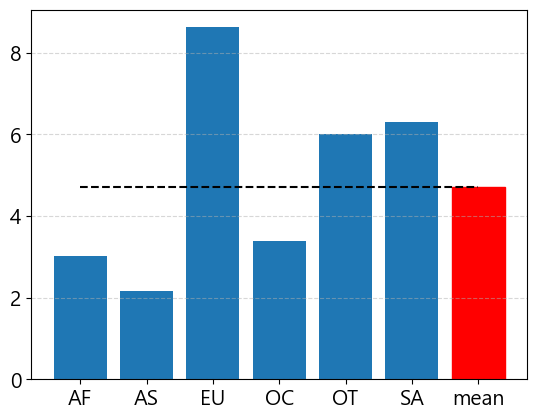

In [167]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력
## 마지막에는 평균 막대그래프를 출력

# 1.전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()
# 2.대륙별 평균을 구하기
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

# 3.컬럼에 대륙별 평균을 추가
con_df['mean'] = data
con_df.index

# 4.막대그래프 출력, 평균을 빨간색으로
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7,ls='--',color='black')
plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# plt.bar(con_df.index,con_df)
con_bar[len(con_df)-1].set_color('red')

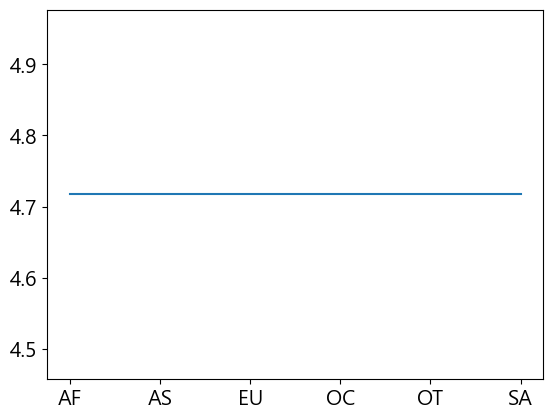

In [160]:
x = total_df.index
y = [data]*6
plt.plot(x,y)